# **K-means Clustering**

* K-mean clustering is a type of unsupervised learning algorithm.
* It works on unlabeled data. 
* It make clusters from unlabeled data.

## **Example**

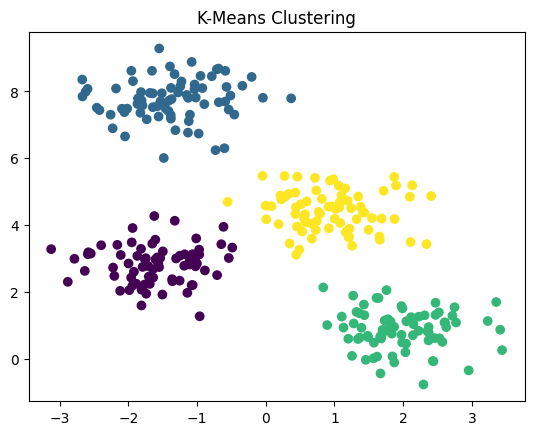

In [22]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns


#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# initiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4)
# fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# plot the data points with different colors for different clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.show()

# Diamond dataset

In [23]:
df = sns.load_dataset('diamonds')
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


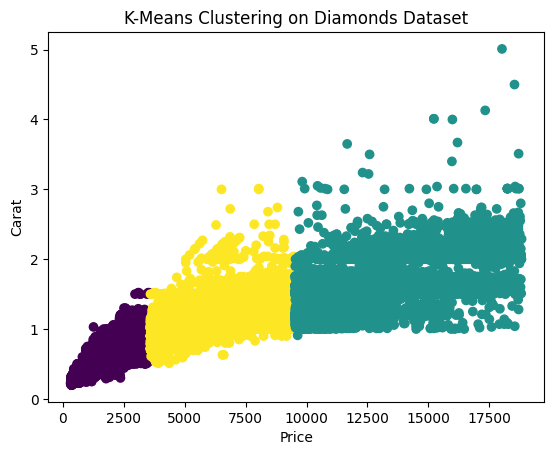

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder


df = sns.load_dataset('diamonds')

X = df[['price', 'carat']]

# initiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=3)

# fit the data to the KMeans algorithm
kmeans.fit(X)
# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
df['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

# Evalulation

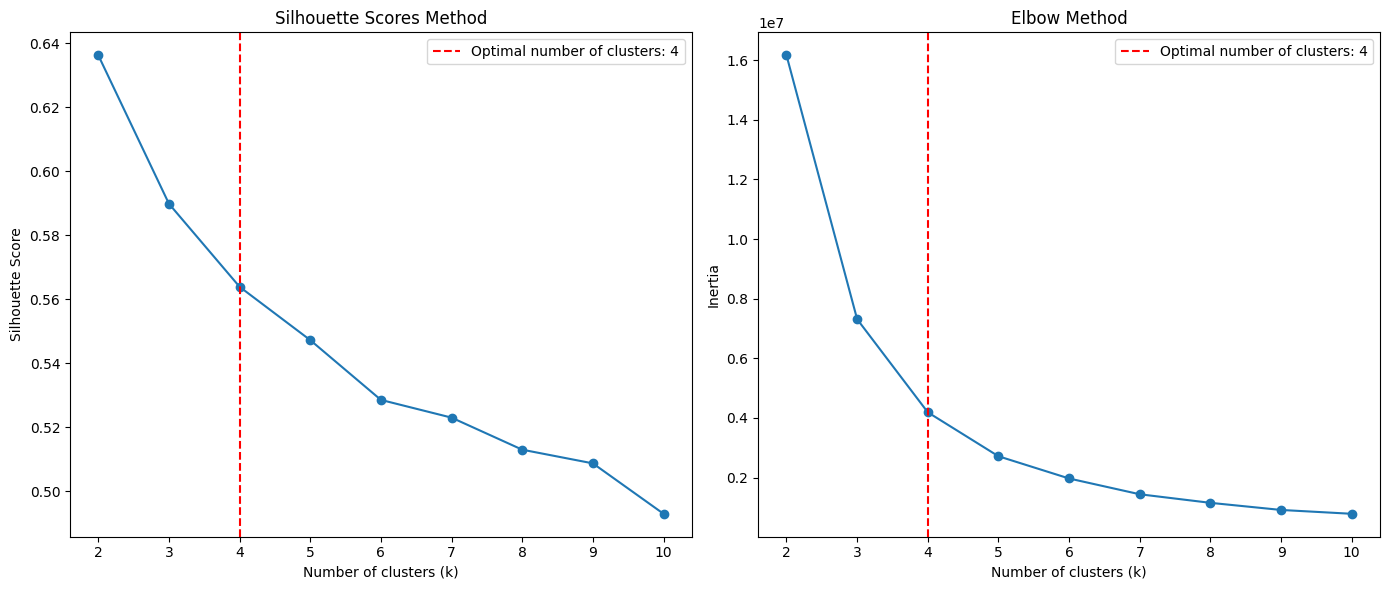

In [25]:
# Range of k values to try

df=df.sample(1000,random_state=42)
X = df[['price', 'carat']]

for i in X:
    X[i]=LabelEncoder().fit_transform(X[i])
    
k_values = range(2, 11)  # Starting from 2 because silhouette score is undefined for k=1
silhouette_scores = []
inertia = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    inertia.append(model.inertia_)

# Use KneeLocator to find the elbow point
kneedle = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
Best_k = kneedle.elbow

# Plot the silhouette scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker="o")
plt.title("Silhouette Scores Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.axvline(x=Best_k, color='r', linestyle='--', label=f'Optimal number of clusters: {Best_k}')
plt.legend()

# Plot the elbow curve
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Draw vertical line at optimal_k
plt.axvline(x=Best_k, color='r', linestyle='--', label=f'Optimal number of clusters: {Best_k}')
plt.legend()

plt.tight_layout()
plt.show()

import warnings
warnings.filterwarnings("ignore")

## Adding cluster labels to the data for further EDA work

In [26]:
# Select relevant columns
X = diamonds[["carat", "price"]]

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.predict(X)

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Display the first few rows of the dataset with the new column added
print(diamonds.head())

#display the unique values of a label
print("These are the unique values of labels: ", sorted(diamonds.labels.unique()))

NameError: name 'diamonds' is not defined

In [ ]:
kmeans.inertia_

37615334449.97956

# Make a parallel coordinate plot using plotly express

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(diamonds, color="labels")
fig.show() 

NameError: name 'diamonds' is not defined

# **Model Evaluation** 
### 1. **Elbow Method**

# Other evaluation methdos

1. **Calinski-Harabasz**
1. **Davies-Bouldin**
2. **Silhouette**
3. **Gap statistic**
4. Bayesian information criterion (BIC)

Many other can be seen from this [blog](https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad)


# **K-means++**

The main difference between K-means and K-means++ lies in the initialization of cluster centroids. The standard K-means algorithm initializes centroids randomly, while K-means++ improves this initialization by selecting centroids in a more strategic and probabilistic manner. Here are the key distinctions:

**Centroid Initialization:**

* K-means: In the original K-means algorithm, centroids are initialized randomly from the available data points.
* K-means++: The K-means++ algorithm initializes the first centroid randomly, but subsequent centroids are chosen based on the distances to previously selected centroids. Data points farther away from existing centroids have a higher probability of being chosen.

**Impact on Clustering Results:**

* K-means: The random initialization in K-means can lead to different clusterings each time the algorithm is run. It is more sensitive to the initial placement of centroids, and there is a higher chance of converging to suboptimal solutions.
* K-means++: By strategically initializing centroids, K-means++ mitigates the sensitivity to initialization. It encourages a more spread-out initialization, which typically leads to better cluster formation and more reliable results. K-means++ tends to produce more stable and consistent clusters across different runs.

**Convergence and Efficiency:**

* K-means: The random initialization in K-means may require more iterations to converge, as the initial centroids might be far from their optimal positions. It can result in slower convergence and higher computational costs.
* K-means++: The improved initialization in K-means++ often leads to faster convergence since the initial centroids are better positioned. It reduces the number of iterations required to achieve convergence and can improve the algorithm's efficiency.
* Overall, K-means++ is a modification of the standard K-means algorithm that provides a more effective and robust initialization scheme. By selecting initial centroids strategically, it enhances the quality of the clustering results and reduces sensitivity to the initial random initialization. K-means++ is widely used in practice as it improves the performance and stability of the K-means clustering algorithm.

In [46]:
df.cluster.value_counts()

cluster
1    32851
2    15374
0     5715
Name: count, dtype: int64

In [28]:
df = sns.load_dataset('iris')
df.drop('species', axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
# run kmeans clustering on df
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)

# Add cluster labels to the dataset
df['cluster'] = kmeans.labels_

df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [30]:
# let's use plotly and make plots

import plotly.express as px
fig = px.scatter(df, x='sepal_length', y='petal_length', color='cluster')
fig.show()

In [31]:
# let's use plotly and make plots
iris = sns.load_dataset('iris')
import plotly.express as px
fig = px.scatter(iris, x='sepal_length', y='petal_length', color='species')
fig.show()

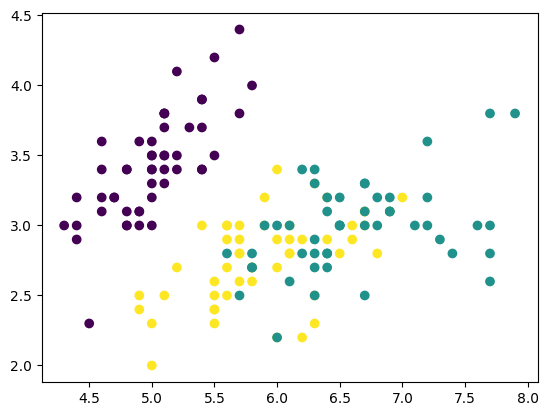

In [32]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

d=sns.load_dataset("iris")

d["species"]=LabelEncoder().fit_transform(d['species'])

X=d
#Make the object
model=KMeans(n_clusters=3)
model.fit(X)

labels=model.labels_

plt.scatter(X.iloc[:,0],X.iloc[:,1],c=labels)

